# Pycaret

Crear entorno virtual

In [ ]:
%python -m venv ./venv

Activar entorno virtual

In [ ]:
%.\venv\Scripts\activate

Instalar dependencias

In [ ]:
%pip install ipykernel pycaret[full]

Note: you may need to restart the kernel to use updated packages.


¿Qué es Pycaret?

Biblioteca Open-Source y Low-Code de Python para automatizar el flujo de trabajo del Machine Learning. Es una herramiento End-to-End para Machine Learning y la gestión de modelos que aumenta exponencialmente la velocidad de los experimentos, mejorando la productividad.

Está dividio por módulos:
* Aprendizaje Supervisado:
  * Clasificación
  * Regresión
* Aprendizaje No Supervisado:
  * Clustering
  * Detección de Anomalías
* Series de tiempo
* Datasets

## Primer experimento con Pycaret

Crearemos un modelo de clasificación.

In [2]:
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pycaret tiene dos APIs con las que podemos trabajar: la funcional y la orientada a objetos.

API Funcional

In [ ]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 42)

API Orientada a Objetos

In [ ]:
from pycaret.classification import ClassificationExperiment
s = ClassificationExperiment()
s.setup(data, target = 'Class variable', session_id = 123)

### Setup

Con esta función inicializamos nuestro experimento en Pycaret y se comienza a preparar el pipeline de transformación de los datos a partir de los parámetros indicados. Debe ser la primero función que llamemos (sin tener en cuenta el *get_data*).

Los únicos parámetros requeridos son: *data* y *target*; el resto son opcionales.

In [3]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 42)

,Description,Value
0,Session id,42
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### Compare Models

Con esta función entrenamos y evaluamos el rendimiento de todos los posibles estimadores o modelos disponibles en Pycaret, usando Cross-Validation. El output es una cuadrícula de puntajes con los promedios obtenidos mediante Cross-Validation. 

In [4]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7784,0.8284,0.5819,0.7369,0.6397,0.4851,0.4994,0.4620
lda,Linear Discriminant Analysis,0.7784,0.8304,0.5819,0.7327,0.6395,0.4848,0.4977,0.0070
ridge,Ridge Classifier,0.7747,0.0000,0.5661,0.7344,0.6297,0.4740,0.4883,0.0050
nb,Naive Bayes,0.7599,0.8160,0.5930,0.6858,0.6275,0.4537,0.4616,0.0050
catboost,CatBoost Classifier,0.7579,0.8205,0.5664,0.6888,0.6118,0.4410,0.4526,0.4440
qda,Quadratic Discriminant Analysis,0.7525,0.8166,0.5775,0.6718,0.6149,0.4356,0.4424,0.0080
et,Extra Trees Classifier,0.7524,0.8100,0.5605,0.6824,0.5995,0.4275,0.4427,0.0250
gbc,Gradient Boosting Classifier,0.7449,0.8158,0.5398,0.6773,0.5874,0.4096,0.4239,0.0220
rf,Random Forest Classifier,0.7393,0.8114,0.5401,0.6601,0.5857,0.4005,0.4101,0.0290
ada,Ada Boost Classifier,0.7336,0.7854,0.5398,0.6396,0.5749,0.3865,0.3961,0.0150


In [5]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Evaluate Model

Esta función sirve para analizar el rendimiento del modelo entrenado con el conjunto de test.

In [6]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Para generar gráficos específicos utilizamos la siguiente función:

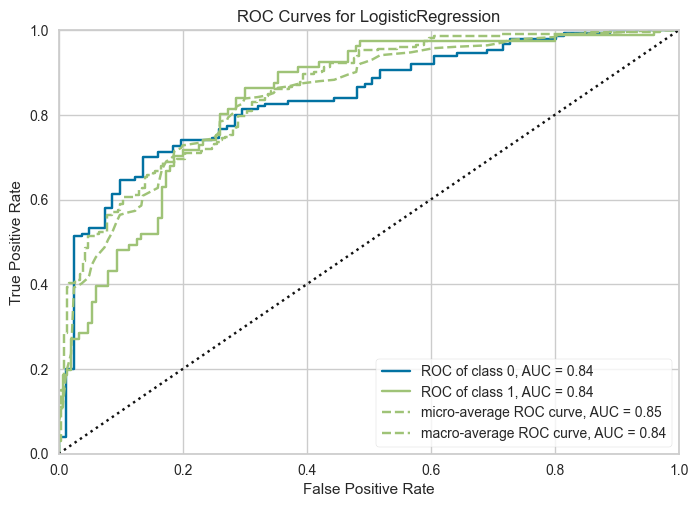

In [7]:
plot_model(best, plot = 'auc')

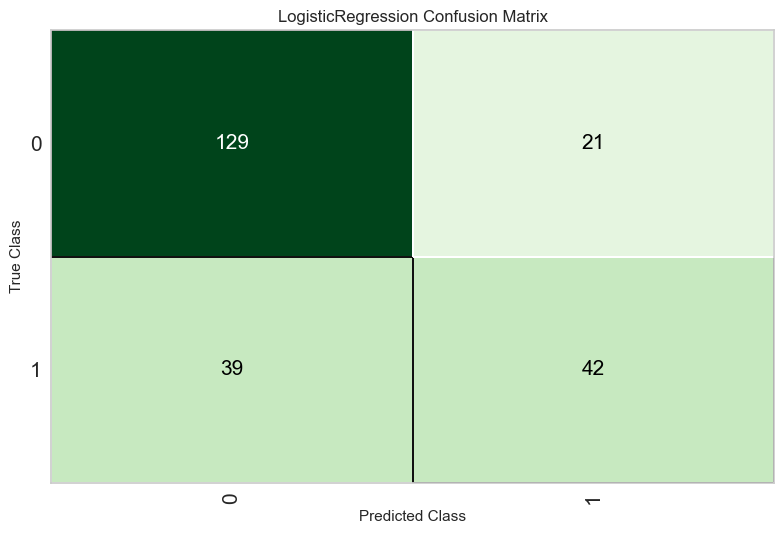

In [8]:
plot_model(best, plot = 'confusion_matrix')

### Predict Model

Esta función nos sirve para realizar las predicciones. Retorna la clase predicha y también la probabilidad. Por defecto las predicciones se realizan sobre el conjunto de entrenamiento.

In [9]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7403,0.8376,0.5185,0.6667,0.5833,0.3989,0.4056


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
730,3,130,78,23,79,28.400000,0.323,34,1,0,0.7718
198,4,109,64,44,99,34.799999,0.905,26,1,0,0.7019
24,11,143,94,33,146,36.599998,0.254,51,1,1,0.7257
417,4,144,82,32,0,38.500000,0.554,37,1,1,0.6318
387,8,105,100,36,0,43.299999,0.239,45,1,0,0.5572
...,...,...,...,...,...,...,...,...,...,...,...
94,2,142,82,18,64,24.700001,0.761,21,0,0,0.7521
437,5,147,75,0,0,29.900000,0.434,28,0,0,0.5020
86,13,106,72,54,0,36.599998,0.178,45,0,1,0.5253
221,2,158,90,0,0,31.600000,0.805,66,1,1,0.6242


Podemos especificar el conjunto de datos sobre el cual queremos que se realicen las predicciones.

In [10]:
predictions = predict_model(best, data=data)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7760,0.8375,0.5746,0.7264,0.6417,0.4820,0.4890


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6810
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9585
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.8043
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9571
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8257


Además, podemos obtener la probabilidad para cada clase.

In [11]:
predictions = predict_model(best, data=data, raw_score=True)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7760,0.8375,0.5746,0.7264,0.6417,0.4820,0.4890


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score_0,prediction_score_1
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.3190,0.6810
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9585,0.0415
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.1957,0.8043
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9571,0.0429
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.1743,0.8257


### Save Model

Podemos guardar nuestro modelo y todo el pipeline del preprocesamiento asociado al Setup utilizando esta función.

In [12]:
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

### Load Model

Podemos cargar nuestro modelo y pipeline guardamos anteriormente utilizando esta función.

In [14]:
loaded_model = load_model('my_first_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\alexg\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weigh...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
          

In [15]:
predict_model(loaded_model, data=data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7760,0.8375,0.5746,0.7264,0.6417,0.4820,0.4890


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6810
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9585
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.8043
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9571
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8257
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900002,0.171,63,0,0,0.7048
764,2,122,70,27,0,36.799999,0.340,27,0,0,0.6839
765,5,121,72,23,112,26.200001,0.245,30,0,0,0.8199
766,1,126,60,0,0,30.100000,0.349,47,1,0,0.7409


## Setup

Ya vimos que esta función es la primera que ejecutamos y la encargada de generar el pipeline para cargar, procesar y transformar nuestro conjunto de datos. Vamos a entrar más en detalle.

In [16]:
from pycaret.datasets import get_data
data = get_data('diabetes')
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 42)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Description,Value
0,Session id,42
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### Parámetros Obligatorios

Solo hay dos parámetros requeridos en el Setup:
* target: float, int, str o secuencia, valor predeterminado = -1
  
    Si es int o str, respectivamente, índice o nombre de la columna objetivo en los datos. El valor predeterminado selecciona la última columna en el conjunto de datos. 

* data: dataframe-like = None
  
    Conjunto de datos con forma (n_samples, n_features), donde n_samples es el número de muestras y n_features es el número de características. Si los datos no son un dataframe de pandas, se convierten a uno utilizando nombres de columna predeterminados.

Nota: target no es necesario cuando se trabaja con Clustering o Detección de Anomalías.

### Preparación de los Datos

#### Valores Faltantes

* imputation_type: string, default = 'simple'

  El tipo de imputación a utilizar. Puede ser simple o iterativa. Si es None, no se realiza ninguna imputación de valores faltantes.
* numeric_imputation: int, float, or string, default = ‘mean’

  Estrategia de imputación para columnas numéricas. Se ignora cuando imputation_type= iterative. Elegir entre:
  * drop: Eliminar filas con valores faltantes.
  * mean: Imputar con el promedio de la columna.
  * median: Imputar con la mediana de la columna.
  * mode: Imputar con la moda de la columna.
  * knn: Imputar usando un enfoque de K-Nearest Neighbors.
  * int or float: Imputar con un valor numérico.
* categorical_imputation: string, default = ‘mode’

  Estrategia de imputación para columnas categóricas. Se ignora cuando imputation_type= iterative. Elegir entre: 
  * drop: Eliminar filas con valores faltantes.
  * mode: Imputar con la moda.
  * str: Imputar con un String.
* iterative_imputation_iters: int, default = 5

  Número de Iteraciones. Se ignora cuando imputation_type=simple.
* numeric_iterative_imputer: str or sklearn estimator, default = 'lightgbm'

  Regresor para la imputación iterativa de valores faltantes en variables numéricas. Si es None, usa un LGBClassifier. Se ignora cuando imputation_type=simple.'
* categorical_iterative_imputer: str or sklearn estimator, default = 'lightgbm'

  Regresor para la imputación iterativa de valores faltantes en variables categóricas. Si es None, usa un LGBClassifier. Se ignora cuando imputation_type=simple.'

Comparación entre Imputación Simple Vs Imputación Iterativa

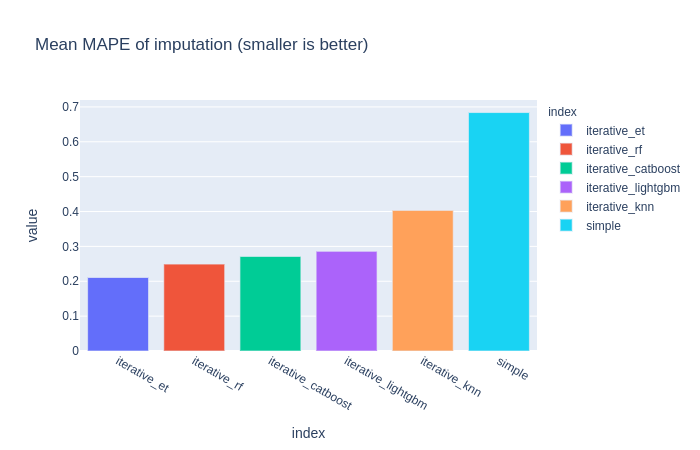

In [18]:
from pycaret.datasets import get_data
hepatitis = get_data('hepatitis')

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


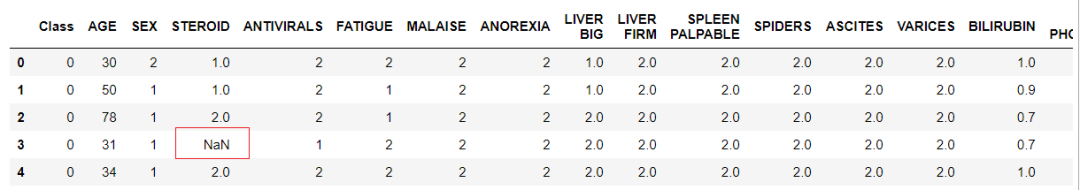

In [20]:
from pycaret.classification import *
setup(data = hepatitis, target = 'Class')

,Description,Value
0,Session id,988
1,Target,Class
2,Target type,Binary
3,Original data shape,"(154, 20)"
4,Transformed data shape,"(154, 20)"
5,Transformed train set shape,"(107, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Rows with missing values,48.1%
9,Preprocess,True


* Rows with missing values:	48.1%
* Preprocess:	True
* Imputation type:	simple
* Numeric imputation:	mean
* Categorical imputation:	mode

In [21]:
hepatitis

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
150,0,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
151,0,61,1,1.0,2,1,1,2,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
152,0,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2
